# Merging It all together

In [52]:
# setting up some code
from random import Random
from math import sqrt,ceil
SEED = 5

In [53]:
def gen_rnd_pnts(N=1000):
    """
    generates random points in the 2 dimensional space, where coordinates are from a random distribution
    :param N: int, optional (default=1000)
                The number of random points to be generated
    :return: tuple of lists
    """
    rnd_gen = Random(x=SEED)
    return (
        [rnd_gen.uniform(a=0,b=1) for _ in range(N)],
        [rnd_gen.uniform(a=0,b=1) for _ in range(N)]
    )

In [54]:
def calc_grad(x_i :list, y_i:list, x_p:float, y_p:float):
    """
    calculates the gradient of a set of points with respect to a given point
    :param x_i: (list): contains x-coordinates of the data points
    :param y_i: (list): contains y-coordinates of the data points
    :param x_p: (float): x-coordinate of a randomly chosen point, initial guess
    :param y_p: (float): y-coordinate of a randomly chosen point initial guess
    :return: A tuple of floats representing the gradient components
    """
    sum_x, sum_y = 0, 0
    n = len(x_i)
    for x, y in zip(x_i, y_i):
        inv_sqrt = ( (x-x_p)**2 + (y-y_p)**2 )**-(0.5)
        sum_x += inv_sqrt*(x-x_p)
        sum_y +- inv_sqrt*(y-y_p)
    return -sum_x/n , -sum_y/n

In [68]:
def loss(x_i, y_i, x_p, y_p):
    n = len(x_i)
    return (1 / n) * sum(
        [sqrt((x_i - x_p)**2 + (y_i - y_p)**2)
         for x_i, y_i in zip(x_i, y_i)
         ]
    )

In [56]:
data_x,data_y = gen_rnd_pnts()

EPOCHS = 100
BATCH_SIZE = 4
N = len(data_x)
NUM_BATCHES = ceil(N/BATCH_SIZE)
DELTA = 1e-2

In [57]:
def train_grad(x_i:list, y_i:list, x_p_gd:float, y_p_gd:float, epochs:int, delta:float):
    losses = []
    for _ in range(epochs):
        grad_x, grad_y = calc_grad(x_i=x_i, y_i=y_i, x_p=x_p_gd, y_p=y_p_gd)
        x_p_gd -= delta * grad_x
        y_p_gd -= delta * grad_y
        losses.append(loss(x_i=x_i,y_i=y_i, x_p=x_p_gd, y_p=y_p_gd))
    return x_p_gd, y_p_gd, losses

In [58]:
def train_stoch_grad(x_i:list, y_i:list, epochs:int, batch_size:int, delta:float, x_p_sgd:float, y_p_sgd:float):
    sampler = Random(x=SEED)
    n=len(x_i)
    indices = [i for i in range(n)]
    num_batches = ceil(n/batch_size)
    losses=[]
    for _ in range(epochs):
        sampler.shuffle(indices)
        for batch_index in range(num_batches):
            batch_indices = indices[batch_index*batch_size:(batch_index+1)*batch_size]
            batch_x = [x_i[i] for i in batch_indices]
            batch_y = [y_i[i] for i in batch_indices]
            grad_x, grad_y = calc_grad(x_i = batch_x, y_i = batch_y,
                                       x_p = x_p_sgd, y_p = y_p_sgd)
            x_p_sgd -= delta * grad_x
            y_p_sgd -= delta * grad_y
            losses.append(loss(x_i = x_i, y_i = y_i,
                               x_p = x_p_sgd, y_p = y_p_sgd))
    return x_p_sgd, y_p_sgd, losses

In [59]:
x_p_gd, y_p_gd, losses_gd = train_grad(x_i = data_x, y_i = data_y,
                                       x_p_gd = 0.3, y_p_gd = 0.3,
                                       epochs = EPOCHS, delta = DELTA)
x_p_sgd, y_p_sgd, losses_sgd = train_stoch_grad(x_i = data_x, y_i = data_y,
                                                x_p_sgd = 0.3, y_p_sgd = 0.3,
                                                epochs = EPOCHS, delta = DELTA,
                                                batch_size = BATCH_SIZE)

From these graphs, we notice that faster convergence occurred in the case of using stochastic gradient descent.
But if we zoom a little bit to the least 1000 updates, we will find out that SGD is way more noisy in convergence compared to normal GD.
When we zoom to the first 100 updates, we will also notice that the GD is slow but smooth, while the SGD is noisy.



C:\Users\EGYPT\AppData\Local\Temp\ipykernel_840\3233690076.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


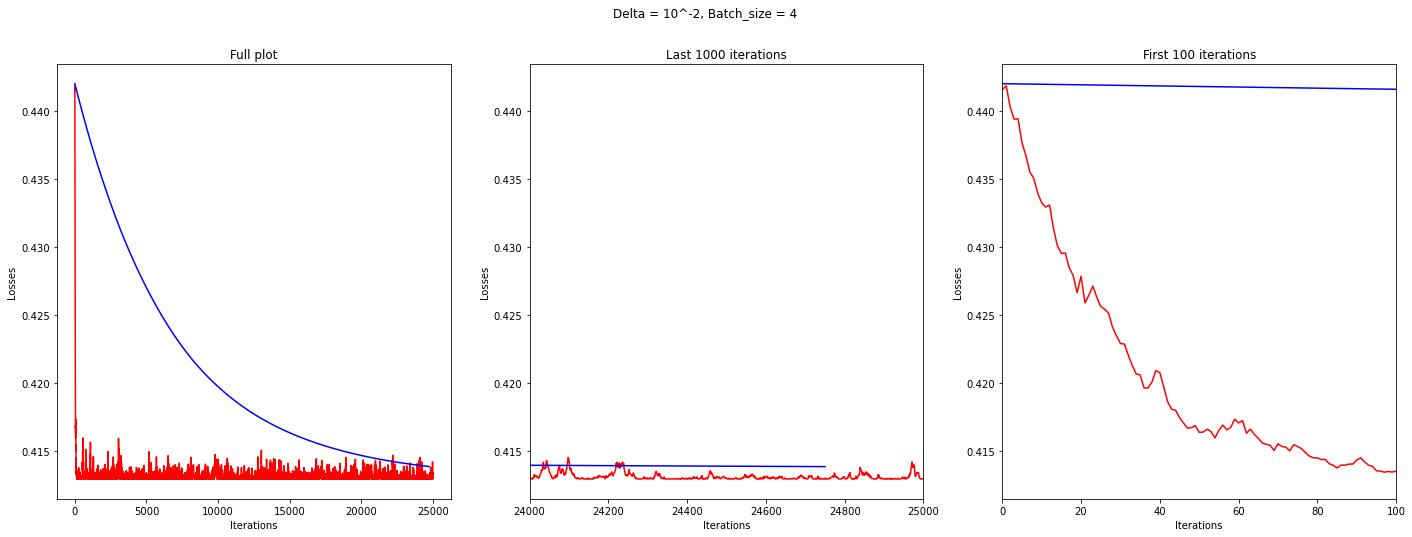

In [65]:
from matplotlib.pyplot import figure

fig = figure(figsize = (24, 8))
ax = fig.add_subplot(1, 3, 1)
ax.plot(losses_sgd, "r")
ax.plot([i * NUM_BATCHES for i in range(len(losses_gd))], losses_gd, "b")
ax.title.set_text("Full plot")
ax.set_xlabel("Iterations")
ax.set_ylabel("Losses")

# Let's focus on the last 1000 iterations
ax2 = fig.add_subplot(1, 3, 2)
ax2.plot(losses_sgd, "r")
ax2.plot([i * NUM_BATCHES for i in range(len(losses_gd))], losses_gd, "b")
ax2.set_xlim(24000, 25000)
# Dr Meena made the y-limits from 0.38 to 0.4, but I found
# that from 0.38 to 0.3821 visualizes it much better
#ax2.set_ylim(0.38, 0.3821)
ax2.title.set_text("Last 1000 iterations")
ax2.set_xlabel("Iterations")
ax2.set_ylabel("Losses")

# Let's focus on the first 100 iterations
ax3 = fig.add_subplot(1, 3, 3)
ax3.plot(losses_sgd, "r")
ax3.plot([i * NUM_BATCHES for i in range(len(losses_gd))], losses_gd, "b")
ax3.set_xlim(0, 100)
ax3.title.set_text("First 100 iterations")
ax3.set_xlabel("Iterations")
ax3.set_ylabel("Losses")

fig.suptitle("Delta = 10^-2, Batch_size = 4")
fig.show()

# Let's write down our notes
print("""From these graphs, we notice that faster convergence occurred in the case of using stochastic gradient descent.
But if we zoom a little bit to the least 1000 updates, we will find out that SGD is way more noisy in convergence compared to normal GD.
When we zoom to the first 100 updates, we will also notice that the GD is slow but smooth, while the SGD is noisy.
""")

In [66]:
# At first, let's reuse some of the code we used in the last lectures

from random import Random
from math import ceil, sqrt

SEED = 5

"""
This function generates N random points in the unit square [0, 1] x [0, 1]
and returns their x-coordinates and y-coordinates as separate lists.

Parameters:
- N: int, optional (default=1000)
    The number of random points to generate.

Returns:
- list_x: list of floats
    A list of N random x-coordinates in the unit square.
- list_y: list of floats
    A list of N random y-coordinates in the unit square.

Algorithm:
- The function generates N random x-coordinates and y-coordinates independently,
using the uniform distribution over [0, 1] provided by the Python `random` module.
- The x-coordinates and y-coordinates are stored in separate lists, `list_x` and `list_y`.
- The lists are returned as a tuple (list_x, list_y).
"""
def generate_random_points(N = 1000):
    random_gen = Random(x = SEED)
    list_x, list_y = [], []

    for _ in range(N):
        list_x.append(random_gen.uniform(a = 0, b = 1))
    for _ in range(N):
        list_y.append(random_gen.uniform(a = 0, b = 1))

    return list_x, list_y

"""
Calculate the gradient of a set of points with respect to a given point.

Parameters:
    x_i (list or array-like): A list or array containing the x-coordinates of a set of points.
    y_i (list or array-like): A list or array containing the y-coordinates of the same set of points as x_i.
    x_p (float, optional): The x-coordinate of a point (not necessarily one of the points in x_i and y_i) at which to compute the gradient. Defaults to 5.
    y_p (float, optional): The y-coordinate of the same point as x_p. Defaults to 5.

Returns:
    A tuple of two floats representing the x-component and y-component of the gradient.
"""
def calc_grad(x_i, y_i, x_p = 5, y_p = 5):
    sum_x, sum_y = 0, 0
    n = len(x_i)
    for x, y in zip(x_i, y_i):
        inv_sqrt = ((x - x_p) ** 2 + (y - y_p) ** 2) ** (-0.5)
        sum_x += inv_sqrt * (x - x_p)
        sum_y += inv_sqrt * (y - y_p)
    return -sum_x/n, -sum_y/n

"""
Calculates the loss value between a point
(x_p, y_p) and a set of data points (x_i, y_i)
using the root mean squared distance between
each data point and the point (x_p, y_p).

Parameters:
x_i (list of float): x-coordinates of the input data points
y_i (list of float): y-coordinates of the input data points
x_p (float): x-coordinate of the point to compare to the data points
y_p (float): y-coordinate of the point to compare to the data points

Returns:
loss (float): The root mean squared distance between
the point (x_p, y_p) and the data points
"""
def loss(x_i, y_i, x_p, y_p):
    n = len(x_i)
    return (1 / n) * sum(
        [sqrt((x_i - x_p)**2 + (y_i - y_p)**2)
         for x_i, y_i in zip(x_i, y_i)
         ]
    )

data_x, data_y = generate_random_points()

# Number of times to visit the WHOLE dataset
EPOCHS = 100

# Number of points contributing to gradient estimate in on update
BATCH_SIZE = 4
# BATCH_SIZE = 12

# Here to calculate the number of batches
N = len(data_x)
NUM_BATCHES = ceil(N / BATCH_SIZE)

# Delta value
DELTA = 1e-2
# DELTA = 1e-1

"""
Train a gradient descent model using the given input data and parameters.

Parameters:
    x_i (list): Input data for x axis.
    y_i (list): Input data for y axis.
    epochs (int): Number of iterations to train for.
    delta (float): Learning rate.
    x_p_gd (float): Initial value for the x parameter (Optional, default 5).
    y_p_gd (float): Initial value for the y parameter (Optional, default 5).

Returns:
    x_p_gd (float): Final value for the x parameter after training.
    y_p_gd (float): Final value for the y parameter after training.
    losses (list): List of losses at each iteration.
"""
def train_grad(x_i, y_i, epochs, delta, x_p_gd = 5, y_p_gd = 5):
    losses = []

    # Run training loop for the given number of epochs
    for _ in range(epochs):
        #  Calculate gradient for current iteration
        grad_x, grad_y = calc_grad(x_i = x_i, y_i = y_i,
                                   x_p = x_p_gd, y_p = y_p_gd)

        # Update parameter values using gradient and learning rate
        x_p_gd -= delta * grad_x
        y_p_gd -= delta * grad_y

        # Calculate and append loss for current iteration
        losses.append(loss(x_i = x_i, y_i = y_i,
                           x_p = x_p_gd, y_p = y_p_gd))

    # Return final parameter values and list of losses
    return x_p_gd, y_p_gd, losses


"""
Train a model using stochastic gradient descent with mini-batch.

Parameters:
    x_i (list): List of input features.
    y_i (list): List of target labels.
    epochs (int): Number of times to iterate over the entire dataset.
    batch_size (int): Number of examples to use in each mini-batch.
    delta (float): Learning rate for the gradient descent algorithm.
    x_p_sgd (int or float): Starting value for the parameter x (Optional, default 5).
    y_p_sgd (int or float): Starting value for the parameter y (Optional, default 5).

Returns:
    x_p_sgd (float): Trained value of parameter x.
    y_p_sgd (float): Trained value of parameter y.
    losses (list): List of loss values at each iteration.
"""
def train_stoch_grad(x_i, y_i, epochs, batch_size, delta, x_p_sgd = 5, y_p_sgd = 5):
    sampler = Random(x = SEED)
    n = len(x_i)
    indices = [i for i in range(len(x_i))]
    num_batches = ceil(n / batch_size)
    losses = []

    # Iterate over the entire dataset for the specified number of epochs
    for _ in range(epochs):
        # Shuffle the indices so that examples are randomly sampled
        # Learn more about shuffle method:
        # https://www.geeksforgeeks.org/random-shuffle-function-in-python/
        sampler.shuffle(indices)

        # Iterate over each mini-batch of examples
        for batch_index in range(num_batches):
            # Extract the indices for the current mini-batch
            batch_indices = indices[batch_index * batch_size
                                    : (batch_index + 1) * batch_size]
            # Extract the features and labels for the current mini-batch
            batch_x = [x_i[i] for i in batch_indices]
            batch_y = [y_i[i] for i in batch_indices]

            # Compute the gradients using the current parameter values
            grad_x, grad_y = calc_grad(x_i = batch_x, y_i = batch_y,
                                       x_p = x_p_sgd, y_p = y_p_sgd)

            # Update the parameter values using the computed gradients
            x_p_sgd -= delta * grad_x
            y_p_sgd -= delta * grad_y

            # Compute the loss using the updated parameter values
            losses.append(loss(x_i = x_i, y_i = y_i,
                               x_p = x_p_sgd, y_p = y_p_sgd))

    # Return final parameter values and list of losses
    return x_p_sgd, y_p_sgd, losses

x_p_gd, y_p_gd, losses_gd = train_grad(x_i = data_x, y_i = data_y,
                                       x_p_gd = 0.3, y_p_gd = 0.3,
                                       epochs = EPOCHS, delta = DELTA)

x_p_sgd, y_p_sgd, losses_sgd = train_stoch_grad(x_i = data_x, y_i = data_y,
                                                x_p_sgd = 0.3, y_p_sgd = 0.3,
                                                epochs = EPOCHS, delta = DELTA,
                                                batch_size = BATCH_SIZE)

# Let's change our DELTA value, notice what will happen in the results and in the graphs
x_p_gd2, y_p_gd2, losses_gd2 = train_grad(x_i = data_x, y_i = data_y,
                                          x_p_gd = 0.3, y_p_gd = 0.3,
                                          epochs = EPOCHS, delta = 1e-1)

x_p_sgd2, y_p_sgd2, losses_sgd2 = train_stoch_grad(x_i = data_x, y_i = data_y,
                                                   x_p_sgd = 0.3, y_p_sgd = 0.3,
                                                   epochs = EPOCHS, delta = 1e-1,
                                                   batch_size = BATCH_SIZE)

# Let's change the batch_size for the SGD calculations
x_p_sgd3, y_p_sgd3, losses_sgd3 = train_stoch_grad(x_i = data_x, y_i = data_y,
                                                   x_p_sgd = 0.3, y_p_sgd = 0.3,
                                                   epochs = EPOCHS, delta = 1e-1,
                                                   batch_size = 12)

print(f"Original DELTA GD: ({x_p_gd}, {y_p_gd})")
print(f"Original DELTA SGD: ({x_p_sgd}, {y_p_sgd})")
print(f"Bigger DELTA GD: ({x_p_gd2}, {y_p_gd2})")
print(f"Bigger DELTA SGD: ({x_p_sgd2}, {y_p_sgd2})")
print(f"Bigger DELTA & batch_size SGD: ({x_p_sgd3}, {y_p_sgd3})")

Original DELTA GD: (0.45320193427520483, 0.4604119555058961)
Original DELTA SGD: (0.4847513277108123, 0.463966921878374)
Bigger DELTA GD: (0.4832598098764912, 0.4905608390087221)
Bigger DELTA SGD: (0.4918455725260783, 0.3829379628433168)
Bigger DELTA & batch_size SGD: (0.4803618338278133, 0.3963811440612421)


From these graphs, we notice that faster convergence occurred in the case of using stochastic gradient descent.
But if we zoom a little bit to the least 1000 updates, we will find out that SGD is way more noisy in convergence compared to normal GD.
When we zoom to the first 100 updates, we will also notice that the GD is slow but smooth, while the SGD is noisy.



C:\Users\EGYPT\AppData\Local\Temp\ipykernel_840\4197573085.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


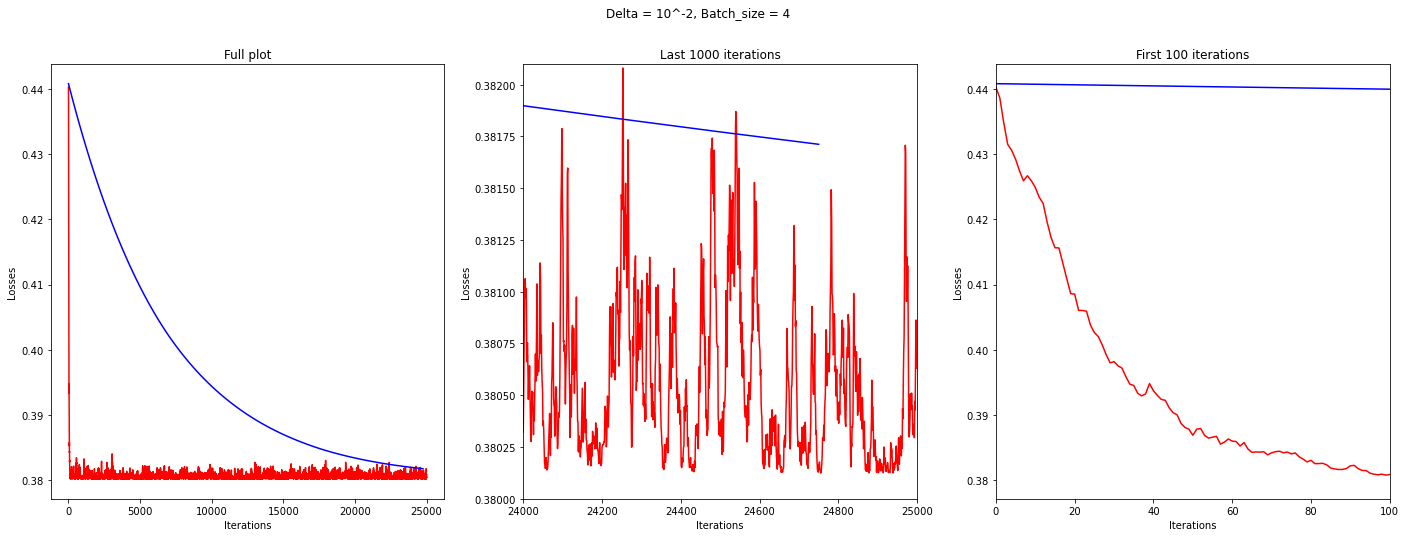

In [67]:
from matplotlib.pyplot import figure

fig = figure(figsize = (24, 8))
ax = fig.add_subplot(1, 3, 1)
ax.plot(losses_sgd, "r")
ax.plot([i * NUM_BATCHES for i in range(len(losses_gd))], losses_gd, "b")
ax.title.set_text("Full plot")
ax.set_xlabel("Iterations")
ax.set_ylabel("Losses")

# Let's focus on the last 1000 iterations
ax2 = fig.add_subplot(1, 3, 2)
ax2.plot(losses_sgd, "r")
ax2.plot([i * NUM_BATCHES for i in range(len(losses_gd))], losses_gd, "b")
ax2.set_xlim(24000, 25000)
# Dr Meena made the y-limits from 0.38 to 0.4, but I found
# that from 0.38 to 0.3821 visualizes it much better
ax2.set_ylim(0.38, 0.3821)
ax2.title.set_text("Last 1000 iterations")
ax2.set_xlabel("Iterations")
ax2.set_ylabel("Losses")

# Let's focus on the first 100 iterations
ax3 = fig.add_subplot(1, 3, 3)
ax3.plot(losses_sgd, "r")
ax3.plot([i * NUM_BATCHES for i in range(len(losses_gd))], losses_gd, "b")
ax3.set_xlim(0, 100)
ax3.title.set_text("First 100 iterations")
ax3.set_xlabel("Iterations")
ax3.set_ylabel("Losses")

fig.suptitle("Delta = 10^-2, Batch_size = 4")
fig.show()

# Let's write down our notes
print("""From these graphs, we notice that faster convergence occurred in the case of using stochastic gradient descent.
But if we zoom a little bit to the least 1000 updates, we will find out that SGD is way more noisy in convergence compared to normal GD.
When we zoom to the first 100 updates, we will also notice that the GD is slow but smooth, while the SGD is noisy.
""")